In [482]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [483]:
# Generate Phantom and Display
    # Parameters:
        # (x,y) resolution
        # Length (real world)
        # attenuation values
        # speed values
def generate_phantom (x,y,length,attenuations, speeds):

    # Create phantom matrix, U matrix, L matrix
    phantom = np.zeros((y,x), np.uint8) # phantom image
    U = np.zeros((y,x), np.float32) # attenuation matrix
    S = np.zeros((y,x), np.float32) # speed matrix
    L = np.ones((y,x), np.float32) # length matrix
    L = L * length / x # how many cm per pixel


    # Trapezoidal Phantom will have 15 loop structures
    # Structures will have relative positions
    a = 0.50
    b = 0.51
    c = 0.30
    d = 0.70

    for k in range (1,15):

        struct_k = np.zeros((y,x), np.float32)
        struct_k[int(y*a):int(y*b),int(x*c):int(x*d)] = 1
        phantom += struct_k.astype(np.uint8)
        U+= struct_k * attenuations[0]
        S += struct_k *speeds[0]
        a = a - 0.01
        b = b - 0.01
        c = c + 0.01
        d = d - 0.01

   
    
     # Add the structures to the phantom
    phantom *= 255
  
    # Write a phantom
    cv2.imwrite("phantom.jpg", phantom)

    # Add structure attenuations to U matrix
    U[np.where(U == 0)] = attenuations[1]
    
    # Add structure speeds to S matrix
    S[np.where(S == 0)] = speeds[1]

    return phantom, U, S, L

In [484]:
# Create a virtual Sensor
def run_ultrasound(U, S, L):
    # Get Intensities
    us = compute_echoes(U, S, L)
    #map to sensor resolution
    return us

In [485]:
# Compute the echoes from the ultrasound
def compute_echoes(U, S, L):
    echoes = np.zeros(U.shape)  
    for i in range(U.shape[0]):
        for j in range(U.shape[1] -1):
            if U[i,j] != U[i,j+1]:
                echoes[i,j] = 1
            else:
                echoes[i,j] = S[i,j] * np.exp(-0.25 * U[i,j] * L[i,j] * j)
    return echoes

In [486]:
# Show the ultrasound
def save_ultrasound(us):
    cv2.imwrite("ultrasound.jpg", normalize_image(us))

In [487]:
def normalize_image(us):
    min_val = np.min(us)
    max_val = np.max(us)
    return (us - min_val)*(255/(max_val-min_val))

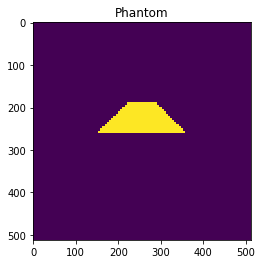

In [488]:
# Phantom Parameters
x = 512 # pixels
y = 512 # pixels
length = 10 # cm

attenuations = np.zeros(2)
attenuations[0] = 0.48 ## fat
attenuations[1] = 1.09 ## muscle

## specific speed (m/sec)
speeds = np.zeros(2)
speeds[0] = 1460 ## fat
speeds[1] = 1580 ## muscle

# Get phantom and matrices
phantom, U, S, L = generate_phantom(x,y,length,attenuations, speeds)


# Display phantom
%matplotlib inline
plt.figure(0)
plt.title("Phantom")
plt.imshow(phantom)

# Compute ultrasound
us = run_ultrasound(U, S, L)
    

In [489]:
# Display graphs
save_ultrasound(us)